# Telco Data Analysis Project:
    

    Goals: 
    Our end goal is to construct a model to predict customer churn using classification techniques, and make predictions for a group of customers.

# Before we begin, we will do our imports 

In [113]:
# Import our files to aquire to aquire and prepare our data. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire as a 
import prepare as pre
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statistics 
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [35]:
pre.data_dict

{'tenure': 'The number of months the customer has been with the provider',
 'monthly_charges': 'the total charges for the month',
 ' total_charges': 'the total charges to the customer',
 ' internet_service_type_fiber_optic': ' bool values to repersent if the customer does have fiber optic',
 'churn': 'Bool value to repersent the customers who leave'}

## First let's aquire our data.

# Now lets  Acquire and Prepare our data 

In [115]:
# we are calling on the acquire.py files to import/query 
# our data and cache the file to our pwd in a csv format. 
df = a.get_telco_data()

## next we prepare the data by calling a prepare.py file uses lines of code to:
- search for and remove nulls
- arranges the columns into proper order
- standardizes the columns 
- drop irrevelent column 
- encoded categorical data 
- converts objects into non-object dtypes
-  AND **** HOLD THE APPLAUSE**** 
- will also split your data into training, validate and test using: <br>
`train, validate, test = p.split_data(df)`

In [116]:
df_0 = a.get_telco_data()
df = a.get_telco_data()
df = pre.prepare_telco(df)
df = df[pre.my_list] # this adjusts the df for only model columns for optimnal visual support
df_0 = pd.DataFrame(df_0['customer_id'])
concatante_list = [df_0, df]
df = pd.concat(concatante_list, axis=1)
train, test, validate = pre.split_data(df)

In [117]:
train

,customer_id,tenure,monthly_charges,total_charges,internet_service_type_fiber_optic,churn
3498,6629-CZTTH,1,55.70,55.70,1,1
2227,3186-BAXNB,1,91.70,91.70,0,0
6346,7929-DMBCV,20,81.00,1683.70,0,1
4905,3858-XHYJO,40,105.75,4228.55,0,0
166,0266-GMEAO,72,114.30,8058.55,0,0
...,...,...,...,...,...,...
5702,6016-NXBNJ,35,19.15,638.00,0,1
6763,9142-KZXOP,44,68.85,2958.95,0,0
3950,7853-GVUDZ,1,20.15,20.15,0,0
4269,8792-AOROI,8,65.50,564.35,1,1


# Lets Explore 

    First we are gonna see what our data looks like, and what a better way asking python to describe it to you. 

In [118]:
train.head()

,customer_id,tenure,monthly_charges,total_charges,internet_service_type_fiber_optic,churn
3498,6629-CZTTH,1,55.70,55.70,1,1
2227,3186-BAXNB,1,91.70,91.70,0,0
6346,7929-DMBCV,20,81.00,1683.70,0,1
4905,3858-XHYJO,40,105.75,4228.55,0,0
166,0266-GMEAO,72,114.30,8058.55,0,0


In [119]:
# Even though we worked so hard to add customer ID we are going to drop it, just bare with me, itll be back 
train_simple = train[pre.my_list] # remember this guy from the imports :)

In [120]:
train.shape

(1478, 6)

    Trust but verify that all our data contains no null values
    

In [121]:
train.isnull().sum()

customer_id                          0
tenure                               0
monthly_charges                      0
total_charges                        0
internet_service_type_fiber_optic    0
churn                                0
dtype: int64

    Here we can see above that the sum of all the null values which shows is zero across the board, woo! No nulls 
    

# Now lets start asking all these questions:
# Is there a linear connection between monthly charges and churn rate 
# lets dive in and start acting like my ex-wife and start throwing accusations:
# H$_0$: There is no linear connection between monthly charges and churn rate 
# H$_a$: There is a linear connection between monthly charges and churn rate 
# Lets see if there is

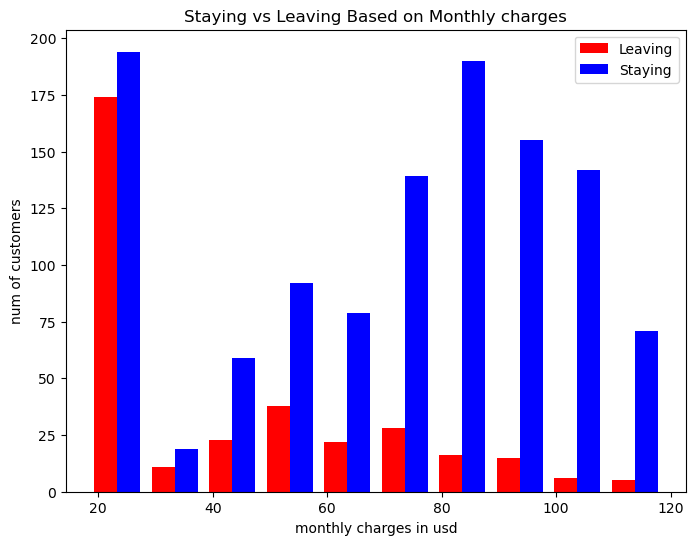

In [122]:
monthly_charges_churn_yes = train[train.churn == 1].monthly_charges
monthly_charges_churn_no = train[train.churn == 0].monthly_charges

plt.figure(figsize=(8,6))
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['red', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('monthly charges in usd')
plt.ylabel('num of customers')
plt.title('Staying vs Leaving Based on Monthly charges')
plt.legend()
plt.show()

In [123]:
# find r 
train.corr()

,tenure,monthly_charges,total_charges,internet_service_type_fiber_optic,churn
tenure,1.000000,0.320313,0.841710,-0.004053,-0.240669
monthly_charges,0.320313,1.000000,0.684801,-0.121846,-0.383120
total_charges,0.841710,0.684801,1.000000,-0.052004,-0.293178
internet_service_type_fiber_optic,-0.004053,-0.121846,-0.052004,1.000000,0.015849
churn,-0.240669,-0.383120,-0.293178,0.015849,1.000000


In [124]:
df.corr()

,tenure,monthly_charges,total_charges,internet_service_type_fiber_optic,churn
tenure,1.000000,0.247900,0.826178,0.013274,-0.233852
monthly_charges,0.247900,1.000000,0.651174,-0.160189,-0.377437
total_charges,0.826178,0.651174,1.000000,-0.052469,-0.295758
internet_service_type_fiber_optic,0.013274,-0.160189,-0.052469,1.000000,0.041899
churn,-0.233852,-0.377437,-0.295758,0.041899,1.000000


# Is there a linear connection between internet_service_type_fiber_optic and churn rate 
# H$_0$: There is no linear connection between internet_service_type_fiber_optic and churn rate 
# H$_a$: There is a linear connection between internet_service_type_fiber_optic and churn rate 
# Lets see if there is

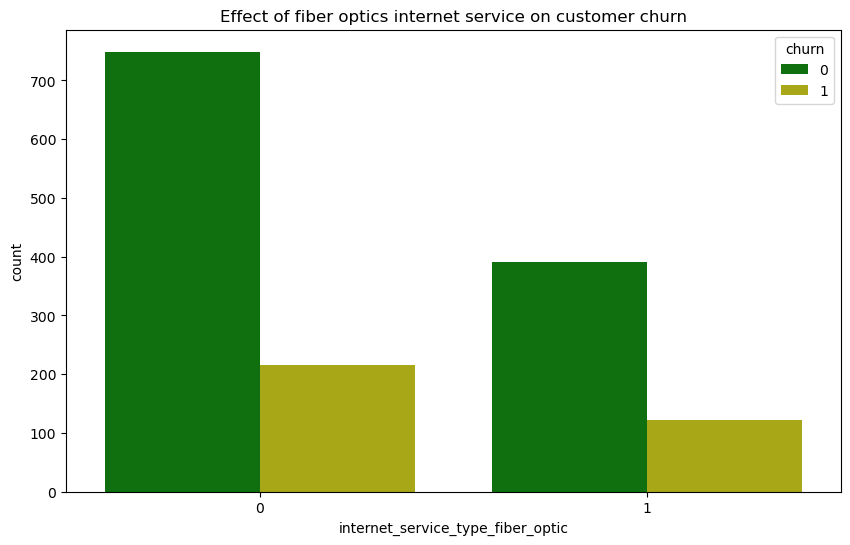

In [125]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'internet_service_type_fiber_optic', hue='churn', data=train, palette=['g', 'y'] )
ax.set_title(f'Effect of fiber optics internet service on customer churn')
plt.show()

In [126]:
observed = pd.crosstab(train.internet_service_type_fiber_optic, train.churn)
observed
# first lets see what our values are 

churn,0,1
internet_service_type_fiber_optic,,
0,749,216
1,391,122


In [127]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [49]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('----------\
Expected Values\n')

print(expected.astype(int))

print('----------')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[749 216]
 [391 122]]
----------Expected Values

[[744 220]
 [395 117]]
----------
chi^2 = 0.2962
p     = 0.5863


### We can see by comparing the observed values are rather close to the expected values. We can confirm that, with the data available, there does not appear to be a significant relationship between internet and churn rate. Thus alows us to assume that the null hypothesis is correct until we have enough evidence to suggest otherwise, or failed to reject H$_0$



# Is there a linear connection between tenure and churn rate 
# H$_0$: There is no linear connection between tenure and churn rate 
# H$_a$: There is a linear connection between tenure and churn rate 

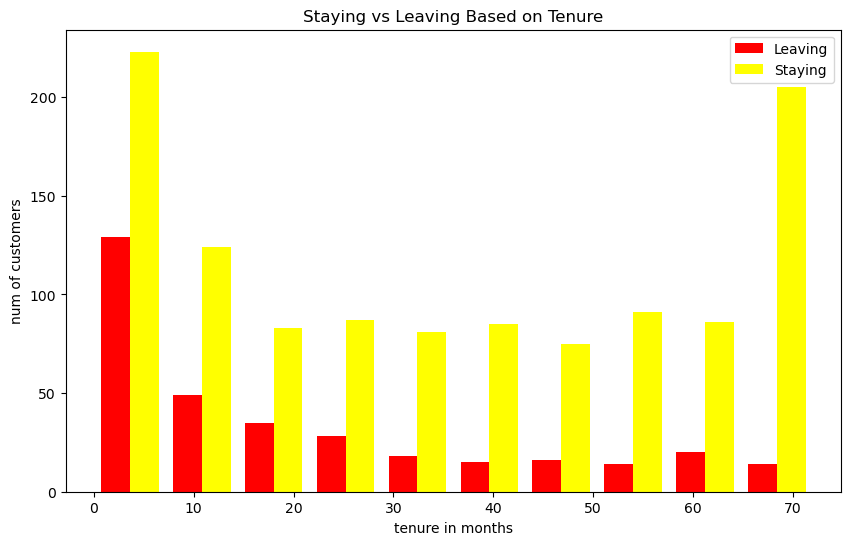

In [128]:
tenure_churn_yes = train[train.churn == 1].tenure
tenure_churn_no = train[train.churn == 0].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['Red', 'yellow'], label= ['Leaving', 'Staying'])
plt.xlabel('tenure in months')
plt.ylabel('num of customers')
plt.title('Staying vs Leaving Based on Tenure')
plt.legend()
plt.show()

# Is there a linear connection between monthly charges and churn rate 
# H$_0$: There is no linear connection between monthly charges and churn rate 
# H$_a$: There is a linear connection between monthly charges and churn rate 

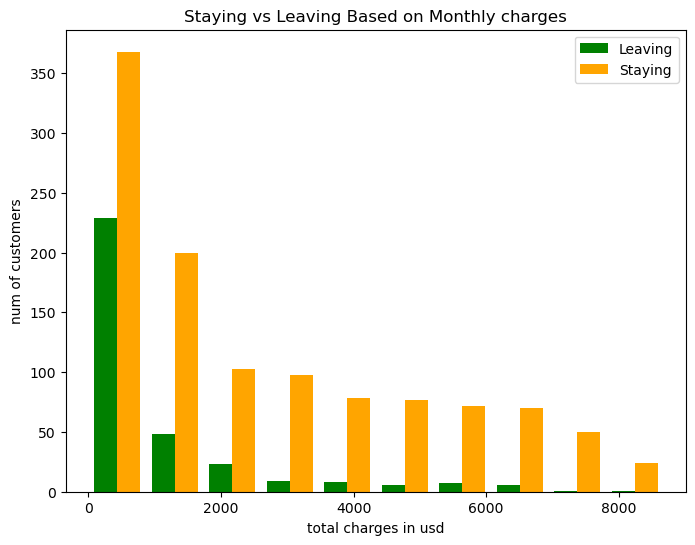

In [129]:
total_charges_churn_yes = train[train.churn == 1].total_charges
total_charges_churn_no = train[train.churn == 0].total_charges

plt.figure(figsize=(8,6))
plt.hist([total_charges_churn_yes, total_charges_churn_no], color=['green', 'orange'], label= ['Leaving', 'Staying'])
plt.xlabel('total charges in usd')
plt.ylabel('num of customers')
plt.title('Staying vs Leaving Based on Monthly charges')
plt.legend()
plt.show()

# Finally Lets model

In [130]:
# Lets define our train data

X_train = train.drop(columns=['churn','customer_id'])
y_train = train.churn



X_validate = validate.drop(columns=['churn','customer_id'])
y_validate = validate.churn





X_test = test.drop(columns=['churn','customer_id'])
y_test = test.churn





In [131]:
# as a brilliant instructor once said 
# make the thing
clf = DecisionTreeClassifier(max_depth= 5)
# max depth show best scores at 7 
# fit the thing
clf = clf.fit(X_train,y_train)
# use the thing
y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
.format(clf.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
.format(clf.score(X_test, y_test)))

# make the thing
clf = DecisionTreeClassifier(max_depth =5)
# fit the thing
clf = clf.fit(X_train,y_train)
# use the thing
y_pred = clf.predict(X_train)

(train['churn'] == y_pred).mean()

y_pred_proba = clf.predict_proba(X_train)


predictions_file = []
y_pred_proba

Accuracy of Decision Tree classifier on training set: 0.82
Accuracy of Decision Tree classifier on validate set: 0.78
Accuracy of Decision Tree classifier on test set: 0.79


array([[0.60248447, 0.39751553],
       [0.83870968, 0.16129032],
       [0.92657343, 0.07342657],
       ...,
       [0.33009709, 0.66990291],
       [0.85      , 0.15      ],
       [0.83870968, 0.16129032]])

In [132]:
# Lets get it a csv out
prediction_csv = train[['customer_id']]
my_concat = [ prediction_csv, pd.Series(y_pred)]
test_1 = pd.concat(my_concat, axis=0)
test_1

,customer_id,0
3498,6629-CZTTH,NaN
2227,3186-BAXNB,NaN
6346,7929-DMBCV,NaN
4905,3858-XHYJO,NaN
166,0266-GMEAO,NaN
...,...,...
1473,NaN,0.0
1474,NaN,0.0
1475,NaN,1.0
1476,NaN,0.0


# Lets Evaluate how the model did

In [10]:
confusion_matrix(y_train, y_pred)

array([[1090,   50],
       [ 222,  116]])

In [72]:
y_pred = clf.predict(X_train)

In [78]:
print(classification_report(y_validate, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [4931, 1478]

# what about the baseline model ? ( yeah? what about it?)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# just a reminder of what were working with 
X_train = train.drop(columns=['baseline','customer_id'])
y_train = train.baseline

X_validate = validate.drop(columns=['baseline','customer_id'])
y_validate = validate.baseline

X_test = test.drop(columns=['baseline','customer_id'])
y_test = test.baseline

In [ ]:
# make the thing
clf = DecisionTreeClassifier(max_depth =5)
# fit the thing
clf = clf.fit(X_train,y_train)
# use the thing
y_pred = clf.predict(X_train)


y_pred_proba = clf.predict_proba(X_train)

confusion_matrix(y_train, y_pred)

# Summary

    So, where does that leave us